In [21]:
"""
Experiment 1: For blemish of same size on the center of all boxes of objects in ground truth labels, what is the drop in metrics?
This experiment is to be repeated in two conditions:
a. vary the size of blemish as per the ratio of area of bounding box to area of the blemish
b. vary the contrast

Insert images required for the experiment in folder1
Store the labels for these images in folder2
The blemish can then be created on these images with required 
characteristics and stored in a different folder3
The validation is then done on the images in folder 1 amnd labels in folder2 --> result for images without blemish is obtained
The validation is then done on images in folder 3 and labels in folder 2 --> results for images with blemish is obtained
The results are stored and analyzed

dig deeper into the confusion matrix creation code..
extract the values and put into a table

"""

'\nExperiment 1: For blemish of same size on the center of all boxes of objects in ground truth labels, what is the drop in metrics?\nThis experiment is to be repeated in two conditions:\na. vary the size of blemish as per the ratio of area of bounding box to area of the blemish\nb. vary the contrast\n'

In [2]:
import cv2
import matplotlib.pyplot as plt
import torch
from yolov5 import utils


c:\Users\cust\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
pip install clearml

You should consider upgrading via the 'c:\Users\cust\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [14]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=VAZAS339LAAOQ6413KZF
%env CLEARML_API_SECRET_KEY=do5YIgdBsTGgMLNPFUMVGHZXajU4jGe1z7BBlEOHKWOtcHRPKp

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=VAZAS339LAAOQ6413KZF
env: CLEARML_API_SECRET_KEY=do5YIgdBsTGgMLNPFUMVGHZXajU4jGe1z7BBlEOHKWOtcHRPKp


In [15]:

from clearml import Task
task = Task.init(project_name="blemish_testing", task_name="blemish@center_forOD")

ClearML Task: created new task id=8dfade345f804f9682c8ec389da8b53a
2022-12-31 10:10:37,457 - clearml.Repository Detection - WARNING - Could not read Jupyter Notebook: No module named 'nbconvert'
2022-12-31 10:10:38,514 - clearml.Task - INFO - Storing jupyter notebook directly as code
2022-12-31 10:10:38,753 - clearml.Repository Detection - WARNING - Can't get url information for git repo in h:\THI- MAPE\Master Thesis\testing_yolo
2022-12-31 10:10:39,215 - clearml.Repository Detection - WARNING - Can't get branch information for git repo in h:\THI- MAPE\Master Thesis\testing_yolo
2022-12-31 10:10:39,597 - clearml.Repository Detection - WARNING - Can't get commit information for git repo in h:\THI- MAPE\Master Thesis\testing_yolo
ClearML results page: https://app.clear.ml/projects/e8d3ba0d12634ac4b549a93a70f2af44/experiments/8dfade345f804f9682c8ec389da8b53a/output/log
2022-12-31 10:10:42,893 - clearml.Repository Detection - WARNING - Can't get diff information for git repo in h:\THI- MAP

ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


In [2]:
#!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
display = utils.notebook_init()  # checks
import utils


YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU


Setup complete  (4 CPUs, 7.9 GB RAM, 89.6/107.4 GB disk)


In [3]:
"""
fn to generate blemish of fixed area ratio on all images
"""

def area_ratio(values,a_ratio):
    area_bbox = (float(values[3])-float(values[1]))*(float(values[4])-float(values[2]))
    print(area_bbox)
    area_blemish = a_ratio * area_bbox
    print(area_blemish)
    blemish_dia = round((4*area_blemish/3.141)**0.5)
    return blemish_dia


In [25]:
print(round(10.8767**0.5))

3


In [5]:
from blemish_generator import blemish_gen

"""
generate blemishes based on the labels and images
"""

"""
path1 : put the labels (with actual x y coordinates of objects)
path2 : the location where output images get stored
path3 : the location where images to be blemished is given
blemish_size : define the diameter of blemish in pixel
intensity_drop : how much opaque must the blemish be (preferable between 0.1 to 1)

Option1: generate blemish of fixed radii on all objects
Option2: generate blemish based on a defined ratio times the size of the object
"""
path3 = 'H:/THI- MAPE/Master Thesis/resources/area_test/'
path1 = 'H:/THI- MAPE/Master Thesis/resources/area_labels/'
path2 = 'H:/THI- MAPE/Master Thesis/resources/exp1_op/'
Option1 = False
a_ratio = 0.5
blemish_size = 100
intensity_drop = 0.6


print('------------------------')
print('BLEMISH CHARACTERISTICS')
print('Blemish Diameter: ',blemish_size)
print('INTENSITY DROP (0.1-1): ',intensity_drop)
print('-----------------------')

print("\nSimulation started....please wait")


for file_ in enumerate(os.listdir(path1)):


    filename1 = path1 + file_[1]
    filename2 = path2 + file_[1]

    image_name = file_[1].split(".")[0] + '.png'

    img = cv2.imread(path3 + image_name)
    img_size = img.shape
    print("Image : ", image_name)

    with open(filename1) as file:
        for line in file:
            values = line.split() #splits the values of every line in the text file to individual values
            x = round((float(values[1]) + float(values[3])) / 2.0)
            y = round((float(values[2]) + float(values[4])) / 2.0)
            print('Blemish generated at ' + f'{x,y}')
            if Option1 is True:
                blem = blemish_gen(img,blemish_size,(y,x),img_size,intensity_drop)
            else:
                blemish_size = area_ratio(values,a_ratio)
                blem = blemish_gen(img,blemish_size,(y,x),img_size,intensity_drop)

        cv2.imwrite(path2+image_name,blem)
    print('Completed:',file_[1])
    print('\n')

print('Simulation completed successfully. Images are saved at' + f'{path2}' )

------------------------
BLEMISH CHARACTERISTICS
Blemish Diameter:  100
INTENSITY DROP (0.1-1):  0.6
-----------------------

Simulation started....please wait
Image :  002501.png
Blemish generated at (630, 202)
2810.0519999999974
1405.0259999999987
intensity_drop 0.6
jugaad
ROI shape (42, 42, 3)
fn shape (42, 42)
Blemish generated at (826, 188)
889.566600000002
444.783300000001
intensity_drop 0.6
jugaad
ROI shape (24, 24, 3)
fn shape (24, 24)
Blemish generated at (977, 188)
3200.119999999997
1600.0599999999986
intensity_drop 0.6
jugaad
ROI shape (45, 45, 3)
fn shape (45, 45)
Blemish generated at (435, 189)
1005.0762000000002
502.5381000000001
intensity_drop 0.6
jugaad
ROI shape (25, 25, 3)
fn shape (25, 25)
Blemish generated at (751, 184)
1195.2332000000026
597.6166000000013
intensity_drop 0.6
jugaad
ROI shape (28, 28, 3)
fn shape (28, 28)
Blemish generated at (654, 182)
1000.9072000000008
500.4536000000004
intensity_drop 0.6
jugaad
ROI shape (25, 25, 3)
fn shape (25, 25)
Blemish gene

ValueError: operands could not be broadcast together with shapes (76,76) (76,74) 

In [3]:
"""
copy non blemished images to folder for validating the images
"""


import os
import shutil

source_folder = 'H:/THI- MAPE/Master Thesis/resources/exp1_images/'
destination_folder = 'H:/THI- MAPE/Master Thesis/blemish_testing/datasets/test_images/images/'

# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # copy only files
    if os.path.isfile(source):
        shutil.copy(source, destination)
        print('copied', file_name)


copied 002501.png
copied 002502.png
copied 002503.png
copied 002504.png
copied 002505.png
copied 002506.png
copied 002507.png
copied 002508.png
copied 002509.png
copied 002510.png
copied 002511.png
copied 002512.png
copied 002513.png
copied 002514.png
copied 002515.png
copied 002516.png
copied 002517.png
copied 002518.png
copied 002519.png
copied 002520.png
copied 002521.png
copied 002522.png
copied 002523.png
copied 002524.png
copied 002525.png
copied 002526.png
copied 002527.png
copied 002528.png
copied 002529.png
copied 002530.png
copied 002531.png
copied 002532.png
copied 002533.png
copied 002534.png
copied 002535.png
copied 002536.png
copied 002537.png
copied 002538.png
copied 002539.png
copied 002540.png
copied 002541.png
copied 002542.png
copied 002543.png
copied 002544.png
copied 002545.png
copied 002546.png
copied 002547.png
copied 002548.png
copied 002549.png
copied 002550.png
copied 002551.png
copied 002552.png
copied 002553.png
copied 002554.png
copied 002555.png
copied 002

In [6]:
!python val.py --weights weights_1500.pt --data coco128.yaml --verbose


-----------confusion matrix---------------

[[    0.62667     0.36745     0.20671    0.073329         nan    0.097723      0.0125     0.22117     0.84821]
 [        nan         nan         nan    0.016223         nan     0.10721         nan         nan    0.010695]
 [        nan         nan    0.012081         nan         nan    0.031309         nan      0.1406   0.0086277]
 [        nan         nan         nan     0.17456         nan    0.026565         nan         nan    0.021659]
 [        nan         nan         nan    0.010058         nan         nan      0.0125         nan         nan]
 [        nan         nan         nan         nan         nan         nan      0.2625         nan   0.0088973]
 [        nan   0.0068241     0.31409         nan         nan         nan         nan         nan         nan]
 [   0.010167     0.21207     0.12081         nan         nan         nan         nan     0.07425    0.094545]
 [    0.36186     0.40997     0.34497     0.71772         nan     0

val: data=H:\THI- MAPE\Master Thesis\testing_yolo\yolov5\data\coco128.yaml, weights=['weights_1500.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to 'H:\THI-': No such file or directory
YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels...:   0%|          | 0/4980 [00:00<?, ?it/s]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels... 1 images, 0 backgrounds, 0 corrupt:   0%|          | 1/4980 [00:36<49:50:58, 36.04s/it]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels... 3 images, 0

In [7]:
import os
import shutil

source_folder = 'H:/THI- MAPE/Master Thesis/resources/exp1_op/'
destination_folder = 'H:/THI- MAPE/Master Thesis/blemish_testing/datasets/test_images/images/'

# fetch all files
for file_name in os.listdir(source_folder):
    # construct full file path
    source = source_folder + file_name
    destination = destination_folder + file_name
    # copy only files
    if os.path.isfile(source):
        shutil.copy(source, destination)
        print('copied', file_name)

!python val.py --weights weights_1500.pt --data coco128.yaml --verbose

copied 002501.png
copied 002502.png
copied 002503.png
copied 002504.png
copied 002505.png
copied 002506.png
copied 002507.png
copied 002508.png
copied 002509.png
copied 002510.png
copied 002511.png
copied 002512.png
copied 002513.png
copied 002514.png
copied 002515.png
copied 002516.png
copied 002517.png
copied 002518.png
copied 002519.png
copied 002520.png
copied 002521.png
copied 002522.png
copied 002523.png
copied 002524.png
copied 002525.png
copied 002526.png
copied 002527.png
copied 002528.png
copied 002529.png
copied 002530.png
copied 002531.png
copied 002532.png
copied 002533.png
copied 002534.png
copied 002535.png
copied 002536.png
copied 002537.png
copied 002538.png
copied 002539.png
copied 002540.png
copied 002541.png
copied 002542.png
copied 002543.png
copied 002544.png
copied 002545.png
copied 002546.png
copied 002547.png
copied 002548.png
copied 002549.png
copied 002550.png
copied 002551.png
copied 002552.png
copied 002553.png
copied 002554.png
copied 002555.png
copied 002

val: data=H:\THI- MAPE\Master Thesis\testing_yolo\yolov5\data\coco128.yaml, weights=['weights_1500.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to 'H:\THI-': No such file or directory
YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels...:   0%|          | 0/4980 [00:00<?, ?it/s]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels... 1 images, 0 backgrounds, 0 corrupt:   0%|          | 1/4980 [00:32<45:30:50, 32.91s/it]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels... 4 images, 0

In [19]:
task = Task.init(project_name="blemish_testing", task_name="blemish@center_forOD")
!python val.py --weights weights_1500.pt --data coco128.yaml --verbose
os.environ['TENSORBOARD_BINARY'] = 'H:/THI- MAPE/Master Thesis/testing_yolo'
%load_ext tensorboard
%tensorboard --logdir runs

val: data=H:\THI- MAPE\Master Thesis\testing_yolo\yolov5\data\coco128.yaml, weights=['weights_1500.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to 'H:\THI-': No such file or directory
YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels.cache... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels.cache... 201 images, 0 backgrounds, 0 corrupt: 100%|██████████| 201/201 [00:00<?, ?it/s]

                 Class     Images  Instances          P 


-----------confusion matrix---------------

[[    0.55086     0.37705     0.12903    0.034722         nan     0.11905         nan     0.24242     0.79572]
 [        nan         nan         nan    0.027778         nan     0.16667         nan         nan    0.011876]
 [        nan         nan         nan         nan         nan    0.047619         nan     0.12121         nan]
 [        nan         nan         nan     0.24306         nan         nan         nan         nan    0.052257]
 [        nan         nan         nan    0.013889         nan         nan         nan         nan         nan]
 [        nan         nan         nan         nan         nan         nan        0.16         nan    0.021378]
 [        nan    0.016393     0.29032         nan         nan         nan         nan         nan   0.0071259]
 [   0.021136     0.21311     0.12903         nan         nan         nan         nan    0.090909     0.10214]
 [    0.42536     0.39344     0.45161     0.68056         nan     0

ERROR: Failed to start 'H:/THI- MAPE/Master Thesis/testing_yolo' (set
by the `TENSORBOARD_BINARY` environment variable): [WinError 5] Access
is denied

In [21]:

%reload_ext tensorboard


In [21]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom' , path = 'H:/THI- MAPE/Master Thesis/testing_yolo/yolov5/weights_1500.pt')

# Image
im = 'https://ultralytics.com/images/zidane.jpg'

# Inference
results = model(im)

results.pandas().xyxy[0]

'pip' is not recognized as an internal or external command,
operable program or batch file.
Using cache found in C:\Users\cust/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,724.317627,430.512878,1229.729004,719.651184,0.253028,0,Car


In [22]:
df = results.pandas().xyxy[0]

In [23]:
df

,xmin,ymin,xmax,ymax,confidence,class,name
0,724.317627,430.512878,1229.729004,719.651184,0.253028,0,Car


In [27]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks



!python val.py --weights weights_1500.pt --data coco128.yaml --verbose

YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU


Setup complete  (4 CPUs, 7.9 GB RAM, 87.4/107.4 GB disk)


val: data=H:\THI- MAPE\Master Thesis\testing_yolo\yolov5\data\coco128.yaml, weights=['weights_1500.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to 'H:\THI-': No such file or directory
YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels...:   0%|          | 0/108 [00:00<?, ?it/s]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels... 1 images, 0 backgrounds, 0 corrupt:   1%|          | 1/108 [00:27<49:12, 27.59s/it]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels... 3 images, 0 back

In [30]:
!pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

import torch
import cv2 

# Model
model = torch.hub.load('ultralytics/yolov5', 'custom' , path = 'H:/THI- MAPE/Master Thesis/testing_yolo/yolov5/weights_1500.pt')

path = 'H:/THI- MAPE/Master Thesis/blemish_testing/datasets/test_images/images/'
# Image
for file_ in enumerate(os.listdir(path)):
    filename1 = path + file_[1]
    img = cv2.imread(filename1)
# Inference
    results = model(img)
    print(results.pandas().xyxy[0])

'pip' is not recognized as an internal or external command,
operable program or batch file.
Using cache found in C:\Users\cust/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Empty DataFrame
Columns: [xmin, ymin, xmax, ymax, confidence, class, name]
Index: []
         xmin        ymin         xmax        ymax  confidence  class name
0  803.215637  188.614731  1234.527832  374.758057    0.915490      0  Car
1  430.988800  173.798172   541.106506  267.456512    0.870310      0  Car
2  508.941589  178.533325   558.734924  241.074997    0.780326      0  Car
3  581.356506  177.779907   634.174316  214.046753    0.688454      0  Car
4  647.154785  177.819611   703.431641  207.995834    0.500798      7  Van
5  649.879150  177.536407   702.306580  207.791229    0.473133      0  Car
6  694.993164  206.879517   811.931458  260.894440    0.313451      7  Van
7  697.734619  208.407028   809.384521  259.685181    0.286099      0  Car
         xmin        ymin        xmax        ymax  confidence  class name
0  386.670929  166.544952  482.817993  273.326477    0.736105      0  Car
1  506.498413  155.210571  558.515076  216.325882    0.639767      0  Car
2  133.102997  190

In [16]:
from blemish_generator import blemish_gen

path3 = 'H:/THI- MAPE/Master Thesis/resources/exp1_images/'
path1 = 'H:/THI- MAPE/Master Thesis/resources/exp1_label/'
path2 = 'H:/THI- MAPE/Master Thesis/resources/exp1_op/'

for file_ in enumerate(os.listdir(path1)):
    filename1 = path1 + file_[1]
    filename2 = path2 + file_[1]

    image_name = file_[1].split(".")[0] + '.png'

    img = cv2.imread(path3 + image_name)
    size = img.shape
    print("Image : ", image_name)

    

    with open(filename1) as file:
        #list2 = []
        
        for line in file:
            #list1 = []
            
            #print(line.rstrip()) 
            values = line.split() #splits the values of every line in the text file to individual values

    
            x = (float(values[1]) + float(values[3])) / 2.0
            y = (float(values[2]) + float(values[4])) / 2.0
            #list1.extend([x,y])


            #print('list1\n',list1)

            #print('\nlist 1 -->',list1)
            #list2.append(list1)
            #print('list2-->\n', list2)
            #print('\n')
            
            blem = blemish_gen(img,60,(y,x))
            print('Blemish generated at ' + f'{x,y}')

        cv2.imwrite(path2+image_name,blem)


    print('Completed:',file_[1])
    print('\n')

Image :  005000.png
Blemish generated at (331.83500000000004, 202.12)
Blemish generated at (944.375, 270.89)
Blemish generated at (813.29, 225.27999999999997)
Blemish generated at (742.745, 207.09)
Blemish generated at (712.155, 200.07999999999998)
Blemish generated at (677.76, 192.775)
Completed: 005000.txt


Image :  005001.png
Blemish generated at (343.525, 257.53)
Blemish generated at (440.54, 213.875)
Blemish generated at (535.1600000000001, 196.28500000000003)
Completed: 005001.txt


Image :  005002.png
Blemish generated at (298.105, 226.45)
Blemish generated at (564.1700000000001, 201.72)
Blemish generated at (1143.72, 192.445)
Completed: 005002.txt


Image :  005003.png
Blemish generated at (583.335, 189.19)
Completed: 005003.txt


Image :  005004.png
Blemish generated at (142.18, 284.92)
Blemish generated at (692.63, 188.20499999999998)
Blemish generated at (626.51, 185.38)
Completed: 005004.txt


Image :  005005.png
Blemish generated at (944.34, 224.12)
Blemish generated at (

In [5]:
from blemish_generator import blemish_gen

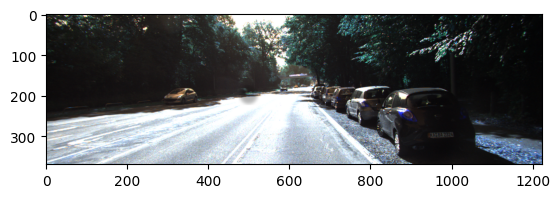

In [4]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('H:/THI- MAPE/Master Thesis/resources/exp_image/005000.png')
blem = blemish_gen(image,50,(200,500))
plt.imshow(blem)

In [19]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks



!python val.py --weights weights_1500.pt --data coco128.yaml --verbose

YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU


Setup complete  (4 CPUs, 7.9 GB RAM, 87.5/107.4 GB disk)


val: data=H:\THI- MAPE\Master Thesis\testing_yolo\yolov5\data\coco128.yaml, weights=['weights_1500.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to 'H:\THI-': No such file or directory
YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels...:   0%|          | 0/24 [00:00<?, ?it/s]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels... 1 images, 0 backgrounds, 0 corrupt:   4%|▍         | 1/24 [00:24<09:28, 24.73s/it]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels... 4 images, 0 backgr

In [20]:
!python val.py --weights weights_1500.pt --data coco128.yaml --verbose

val: data=H:\THI- MAPE\Master Thesis\testing_yolo\yolov5\data\coco128.yaml, weights=['weights_1500.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=True, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
fatal: cannot change to 'H:\THI-': No such file or directory
YOLOv5  2022-12-21 Python-3.9.7 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels...:   0%|          | 0/24 [00:00<?, ?it/s]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels... 1 images, 0 backgrounds, 0 corrupt:   4%|▍         | 1/24 [00:21<08:08, 21.25s/it]
val: Scanning H:\THI- MAPE\Master Thesis\blemish_testing\datasets\test_images\labels... 5 images, 0 backgr

In [ ]:
#TESTER CODE

from blemish_generator import blemish_gen


path3 = 'H:/THI- MAPE/Master Thesis/resources/exp1_images/'
path2 = 'H:/THI- MAPE/Master Thesis/resources/check/'
image_name = '002503.png'
img = cv2.imread(path3 + image_name)
cv2.imwrite(path2+image_name,img)
size = img.shape
blem = blemish_gen(img,100,(190,620),size)
cv2.imwrite(path2+'002503_0.6.png',blem)